In [2]:
import cv2
import matplotlib.pyplot as plt

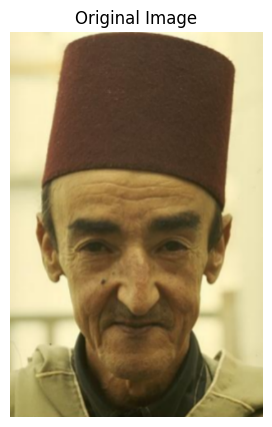

In [3]:
# Load the original image
image = cv2.imread('image2.jpg')  # Replace with your image path
if image is None:
    raise ValueError("Image not found. Please check the path and try again.")
# Display the smoothed image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


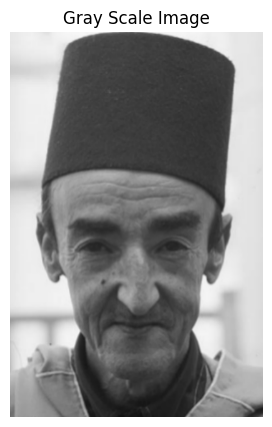

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Gray Scale Image')
plt.axis('off')
plt.show()

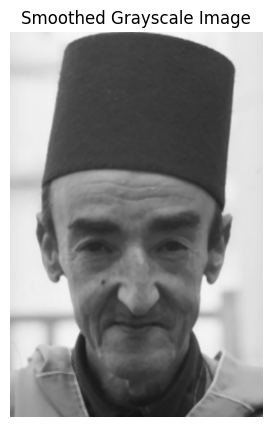

In [12]:
# Apply median filter to remove noise
denoised_gray = cv2.medianBlur(gray, 3)  # Kernel size 3x3
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(denoised_gray, cv2.COLOR_BGR2RGB))
plt.title('Smoothed Grayscale Image')
plt.axis('off')
plt.show()

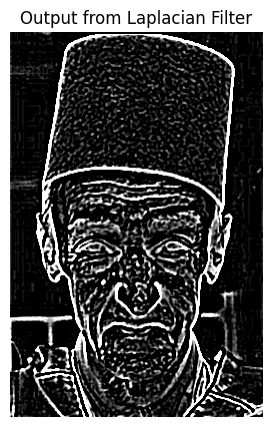

In [13]:
# Step 2: Edge Detection using Laplacian Filter
# Apply Laplacian filter to detect edges
laplacian = cv2.Laplacian(denoised_gray, cv2.CV_8U, ksize=5)
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
plt.title('Output from Laplacian Filter')
plt.axis('off')
plt.show()

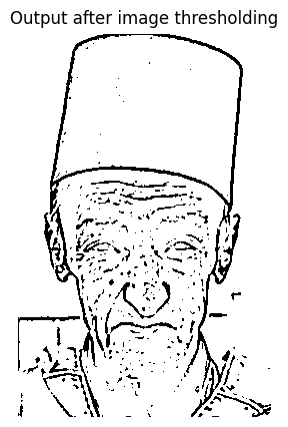

In [14]:
# Convert to binary image for sketch effect (lowered threshold)
_, binary_edges = cv2.threshold(laplacian, 180, 255, cv2.THRESH_BINARY_INV)  # Adjusted threshold
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(binary_edges, cv2.COLOR_BGR2RGB))
plt.title('Output after image thresholding')
plt.axis('off')
plt.show()

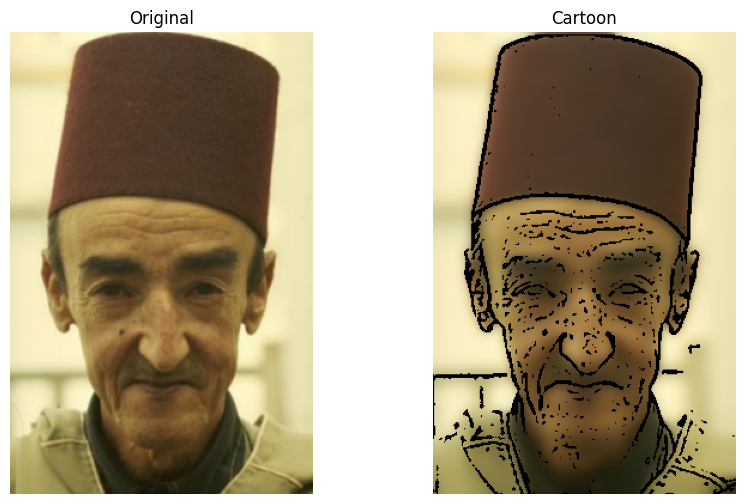

In [ ]:
# Step 3: Strong Cartoon Effect using Multiple Small Bilateral Filters
# Parameters for bilateral filter
num_bilateral_filters = 5  # Reduced number of repetitions
filter_size = 9  # Bilateral filter size
color_strength = 150  # Sigma color
positional_strength = 120  # Sigma space

# Apply bilateral filter multiple times
smoothed_color = image.copy()
for _ in range(num_bilateral_filters):
    smoothed_color = cv2.bilateralFilter(smoothed_color, d=filter_size, sigmaColor=color_strength, sigmaSpace=positional_strength)

#cv2.imshow('Output from bilateral filter', smoothed_color)

    
cartoon=cv2.bitwise_and(smoothed_color, smoothed_color, mask=binary_edges)


# Display results using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Display original image
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

# Display cartoon image
ax[1].imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
ax[1].set_title('Cartoon')
ax[1].axis('off')

plt.show()
